# Data Analytics Challenge - Startup Investments 🚀


The goal of this challenge is to analyze a [dataset about startup investments from Crunchbase](https://www.kaggle.com/arindam235/startup-investments-crunchbase/data). Some cells are already implemented, you just need to **run** them. Some other cells need you to write some code.

### Here is a quick guide on how to use this Jupyter Notebook 🤔

* Type inside the empty cells to write code. These empty cells will have a `In [ ]:` prefix before
* Press the `return/enter ⏎` key to add a new line inside the cell
* To display your results use the Python built in `print(STUFF_YOU_WANT_TO_PRINT)` method or simply put the stuff you want to print as the last line inside the cell. The result of the last line will appear as the `Out[]:` or the output of the cell :)
* Press `shift` + `return/enter ⏎` to run your code 🤓 this will run the code inside your currently selected cell and print anything inside `print()` method and the last line of your cell
* To add a new cell, select any cell and press the `b` key (make sure you are not just typing the letter `b` in the cell). This will add a new cell below
* To delete a cell, double press the `d` key (make sure you are not just typing the letter `d` in the cell)

### Start the challenge by running the two following cells:

In [1]:
# we will need these libraries to run our analytics and visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# we will read the CSV file into a DataFrame - the format that we can easily analyze and manipulate
# we cleaned up the data a little bit for you already (but just a little)
investments_df = pd.read_csv("data/crunchbase_investment_data_LeWagonCleaned.csv", decimal=",")

### 👀 Feel free to have a quick glance at the data - `.shape`, `.columns`, `.head()`, `.tail()`, `.dtypes` 
<br>

<details>
    <summary>Not sure how? Reveal some tips 🙈</summary>

<p> 
<pre>
investments_df.shape
investments_df.columns
investments_df.head() # you can add a number in parentheses for how many first rows you want to display
investments_df.dtypes
</pre>
</details>

In [6]:
# your code here
investments_df.shape
investments_df.columns
investments_df.head()
investments_df.tail()

,Unnamed: 0,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,...,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,angel,round_A,round_B,round_C
10431,49419,/organization/zymetis,Zymetis,http://www.zymetis.com,|Biotechnology|,Biotechnology,2257464,closed,USA,MD,...,2006-Q1,2006,2010-01-11,2010-01-31,0.0,757464.0,0.0,0.0,0.0,0.0
10432,49424,/organization/zyncro,Zyncro,http://www.zyncro.com,|Social Business|Enterprise 2.0|Cloud Computin...,MicroBlogging,3805520,operating,ESP,NaN,...,2009-Q3,2009,2011-04-05,2012-02-03,0.0,3805520.0,0.0,1699920.0,2105600.0,0.0
10433,49425,/organization/zynerba-pharmaceuticals,Zynerba Pharmaceuticals,http://zynerba.com,|Pharmaceuticals|,Pharmaceuticals,13000000,operating,USA,PA,...,2014-Q1,2014,2014-10-14,2014-10-14,0.0,13000000.0,0.0,0.0,0.0,0.0
10434,49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,25000000,operating,USA,MD,...,2008-Q1,2008,2010-09-09,2010-09-09,0.0,25000000.0,0.0,25000000.0,0.0,0.0
10435,49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600,operating,AUT,NaN,...,2007-Q1,2007,2013-01-29,2013-01-29,0.0,2686600.0,0.0,2686600.0,0.0,0.0


### 🧹 You might have noticed, we still have some cleaning to do on our DataFrame 

First of all let's see how many empty values are there in our DataFrame using the [DataFrame.isnull() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
investments_df.isnull().sum()
</pre>
</details>

In [13]:
# your code here
investments_df.isnull().sum()

Unnamed: 0              0
permalink               0
name                    0
homepage_url            0
category_list           0
market                  0
funding_total_usd       0
status                  0
country_code            0
state_code           2861
region                  0
city                  109
funding_rounds          0
founded_at              0
founded_month           0
founded_quarter         0
founded_year            0
first_funding_at        0
last_funding_at         0
seed                    0
venture                 0
angel                   0
round_A                 0
round_B                 0
round_C                 0
dtype: int64

Let's go ahead and drop some columns, that are particularly full of `nulls` or those that are too specific for our analysis.


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>


<p>Now that we had a quick glance, let's drop the columns we won't use this time. As you can see, we have TMI 🤯</p>
<pre>
columns_to_drop = ['Unnamed: 0', 'state_code', 'city', 'region', 'founded_at', 'founded_month', 'founded_quarter', 'permalink', 'category_list', 'first_funding_at', 'last_funding_at']
investments_df.drop(columns_to_drop, axis="columns", inplace=True)
</pre>
</details>

In [ ]:
# your code here
columns_to_drop = ['Unamed: 0', 'state_code', 'city', 'region', 'founded_at', 'founded_month', 'founded_quarter', 'permalink', 'category_list', 'first_funding_at', 'last_funding_at']
investments_df.drop(columns_to_drop, axis="columns", inplace = True)

Finally, let's clean up those last columns about different types of funding, which currently are showing up as `object`, or essentially a string. We will need to use the [Pandas series astype() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html?highlight=astype#pandas.Series.astype) to turn those funding sums into floats.

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
investments_df['seed'] = investments_df['seed'].astype(float)
investments_df['angel'] = investments_df['angel'].astype(float)
investments_df['venture'] = investments_df['venture'].astype(float)
investments_df['round_A'] = investments_df['round_A'].astype(float)
investments_df['round_B'] = investments_df['round_B'].astype(float)
investments_df['round_C'] = investments_df['round_C'].astype(float)
</pre>
</details>

In [78]:
# your code here
investments_df['seed'] = investments_df['seed'].astype(float)
investments_df['angel'] = investments_df['angel'].astype(float)
investments_df['venture'] = investments_df['venture'].astype(float)
investments_df['round_A'] = investments_df['round_A'].astype(float)
investments_df['round_B'] = investments_df['round_B'].astype(float)
investments_df['round_C'] = investments_df['round_C'].astype(float)

### ✨Our DataFrame is now clean and ready for us to explore

Curious to check your favorite startup? 💡You can do that using `investments_df[investments_df['name'].str.contains('COMPANY NAME')]`

#### Let's start with few quick [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) questions 🤔

❓What are the top 10 funded startups in our DataFrame?


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
investments_df.nlargest(10, 'funding_total_usd')
</pre>
<p>P.S. you can run the line below if you don't like looking at exponents</p>
<pre>
pd.options.display.float_format = '{:20,.2f}'.format
</pre>
</details>

In [29]:
# your code here

investments_df.nlargest(10, 'funding_total_usd')


❓What are the different statuses of startups?


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
investments_df['status'].unique()
</pre>
</details>

In [30]:
# your code here
investments_df['status'].unique()

array(['operating', 'acquired', 'closed'], dtype=object)

❓What are the 10 countries with most startups represented? Do you notice some potential bias in our data?


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
investments_df['country_code'].value_counts().head(10)
</pre>
</details>

In [31]:
# your code here
investments_df['country_code'].value_counts().head(10)

USA    7315
GBR     515
CHN     293
CAN     262
FRA     259
ISR     226
IND     190
DEU     183
ESP     108
SWE      81
Name: country_code, dtype: int64

❓What are your assumptions about the markets with most startups in recent decades? See if you are right!


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
investments_df['market'].value_counts().head()
</pre>
</details>

In [32]:
# your code here
investments_df['market'].value_counts().head()

 Software                1250
 Biotechnology           1016
 Mobile                   481
 Enterprise Software      374
 E-Commerce               372
Name: market, dtype: int64

🏋️‍**Optional: Adding Boolean Analysis**: how many startups were underfunded? Let's say that means they received less than $1 million in investment


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
underfunded = investments_df['funding_total_usd'] < 1000000
investments_df[underfunded] # this way we get a DataFrame of underfunded startups
len(investments_df[underfunded]) # to get the number
</pre>
</details>

In [33]:
# your code here
underfunded = investments_df['funding_total_usd'] < 1000000
investments_df[underfunded] # this way we get a DataFrame of underfunded startups
len(investments_df[underfunded]) # to get the number

1767

-------

### 🎨 Let's start visualizing - `CountPlot` for making quick bar charts

For our first visualisations we will be using the [Seaborn Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html). 

Countplot is great for counting the occurence of the unique values in each column. For example, we used it for knowing how many of each apartment type are there in the AirBnB listings and even how many different types are there, without us running any extra code.

#### Let's begin! 📊

1️⃣Make a countplot with the different statuses of startups

P.S. remember the different methods you can use to explore your DataFrame - `.columns`, `.head()` and others - in case you are not sure which data points to use ;)


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
sns.countplot(data=investments_df, x='status')
</pre>
</details>

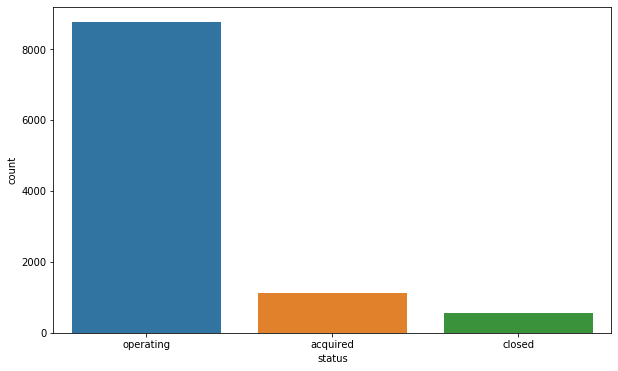

In [34]:
# by the way, you can add this line *before each* plot that let's you adjust the (width, height) of the chart:
plt.figure(figsize=(10, 6))

# your code here
sns.countplot(data=investments_df, x = 'status')

--------

2️⃣Let's count how many startups were founded in each year. What's the best order to sort here?

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p> 
<pre>
sns.countplot(data=investments_df, x='founded_year')
</pre>
</details>

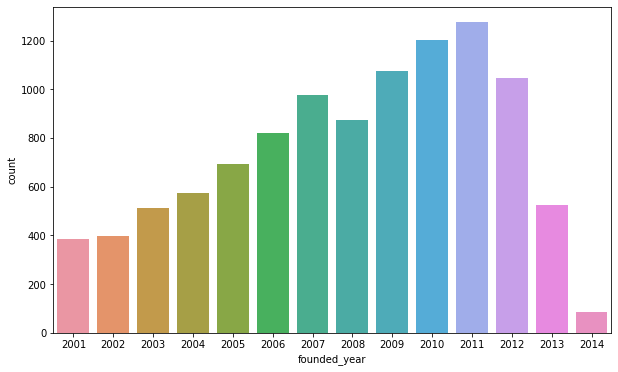

In [41]:
# remember, you can add this line *before each* plot that let's you adjust the (width, height) of the chart:
plt.figure(figsize=(10, 6))

# your code here
sns.countplot(data = investments_df, x = 'founded_year')

-------------

3️⃣**Adding a hue**: let's add a `hue` attribute to our Countplot. For example like this `sns.countplot(data=investments_df, x='founded_year', hue='funding_rounds')`. What does that do? Try running the cell below!

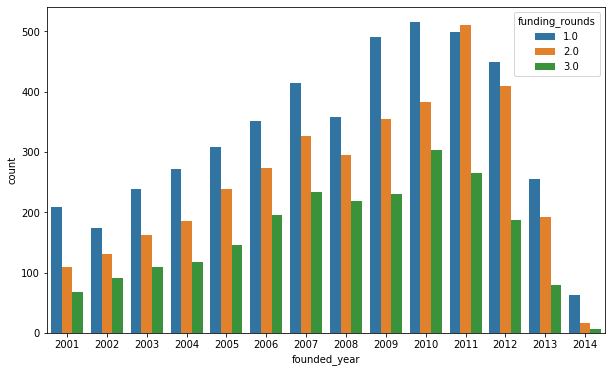

In [42]:
# remember that you can change the size of each plot; this will be helpful as our Data Visualization goes deeper
plt.figure(figsize=(10, 6))
sns.countplot(data=investments_df, x='founded_year', hue='funding_rounds')

What other column would be good to use with `hue`? 🤔

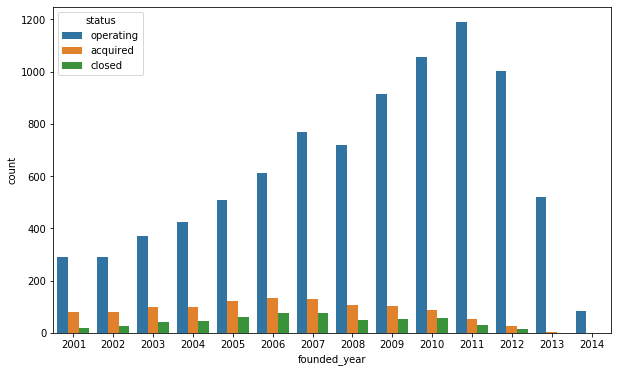

In [46]:
# your code here
plt.figure(figsize=(10, 6))
sns.countplot(data=investments_df, x='founded_year', hue='status')

---------------

🏋️‍ **Optional: Adding an order**: let's add a `order` attribute to our Countplot so that we can control the order of bars in our chart, as well as how many are displayed. The syntax looks like this `sns.countplot(data=investments_df, x='founded_year', order=❓)`. First let's figure out how we get the order!

Do you remember how you got the countries or markets with most startups?

`investments_df['market'].value_counts().head(5)` for example will give us a list of five markets with most startups.

If we want to capture the **order** of this list we need to add the `.index` in the end, so that we store the index (or position) of each market in the list.

`investments_df['market'].value_counts().head(5).index`

Feel free to give it a try!

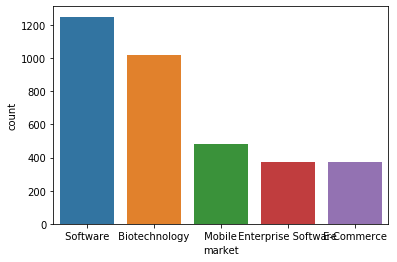

In [47]:
order = investments_df['market'].value_counts().head(5).index
sns.countplot(data=investments_df, x='market', order=order)

Now your goal is to make a Countplot of the 10 countries with most startups, in a descending order. Then try to do the same with top 10 markets!


<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<p>Tip: don't try to put everything on the same line if it's getting too long. Your code should be easy to read for you and others.</p>
<pre>
top_10_countries = investments_df['country_code'].value_counts().head(10)
order = top_10_countries.index
sns.countplot(data=investments_df, x='country_code', order=order)
</pre>
<p>Try to recreate the same countplot of top 10 markets using the code above! You got this 😉</p>
</details>

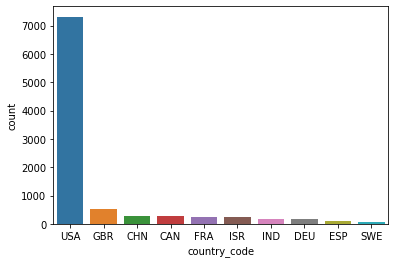

In [48]:
# your code here
order1=investments_df['country_code'].value_counts().head(10).index
sns.countplot(data=investments_df, x = 'country_code', order=order1)

---------

### 🎨 Next step -  `Distplot` - a quick way to make [histograms](https://www.mathsisfun.com/data/histograms.html)

The [Seaborn Distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) is useful for seeing how non-repetative values are distributed. This chart is particularly useful for understanding distribution of numeric values (for example, the price in our AirBnB data) or other data points which do not have standard values. Try running the cell below to make our first Distplot with the total funding figures!

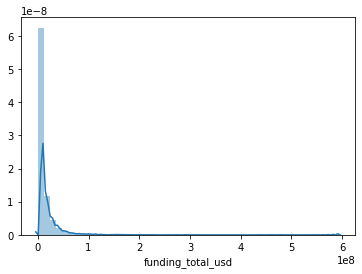

In [49]:
sns.distplot(investments_df['funding_total_usd'])

You'll notice that, same as with our AirBnB data, we have outliers that heavily skew the data. A good measure would be to check the [mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) of the columns in question and double that, removing anything beyond that number.

Let's try with `funding_total_usd`!

In [50]:
investments_df['funding_total_usd'].mean()

11667457.339785358

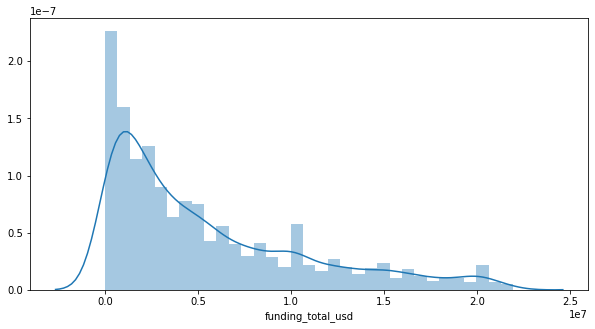

In [83]:
funding_total_normalized = investments_df[investments_df['funding_total_usd'] < 22_000_000] # this is just another way to write numbers to make the amount of zeroes more visible
plt.figure(figsize=(10,5))
sns.distplot(funding_total_normalized['funding_total_usd'])

In some other cases, you'll notice we have a lot of '0' values in a column. So even if the mean looks good, we can also check the [median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html) to see the truth 😱

In [79]:
print(investments_df['seed'].mean())
print(investments_df['seed'].median())

161541.536699885
0.0


In a case like that, we might just want to get rid of the 0 values, and focus on those present to get more significant insight.

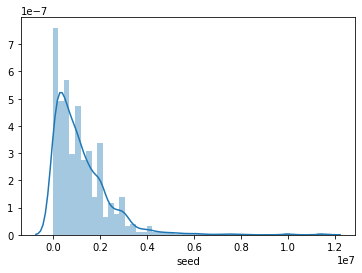

In [80]:
startups_with_seed = investments_df[investments_df['seed'] > 0]
sns.distplot(startups_with_seed['seed'])

❓You notice in the histogram that columns variate between taller and shorter ones. What could be the explanation for those?

Try out your own Distplots by changing the columns! `angel`, `seed`, `venture` can be good options!

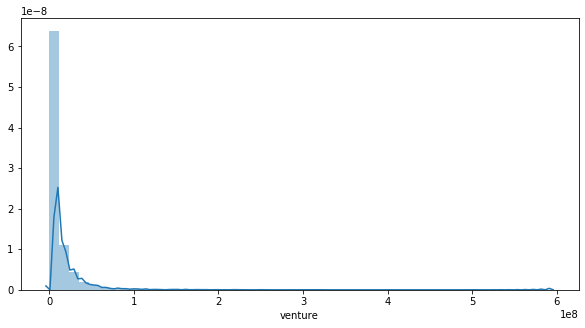

In [64]:
# your code here
startups_with_venture = investments_df[investments_df['venture'].astype(float)>0]
plt.figure(figsize=(10,5))
sns.distplot(startups_with_venture['venture'])

-----

### 🎨 Onto to the `ViolinPlot` - a chart for analysing grouped distribution

We want to use the [Seaborn Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) when we want to see distribution not only across our general DataFrame, but grouped by a category column (for example, prices by apartment type on AirBnB). This is useful for understanding the effect of different factors on a datapoint in question.

The typical syntax for a Violinplot is `sns.violinplot(data=❓, x=❓, y=❓)`. For `data` we suggest using the `funding_total_normalized` DataFrame, so that we have a more fairly distributed graph :)

Let's begin the first challenge! 🚀

1️⃣ Let's start with seeing if total funding is distributed differently depending on whether a startup is operating / acquired / closed! 🤔

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<pre>
sns.violinplot(data=funding_total_normalized, x='status', y='funding_total_usd')
</pre>
</details>

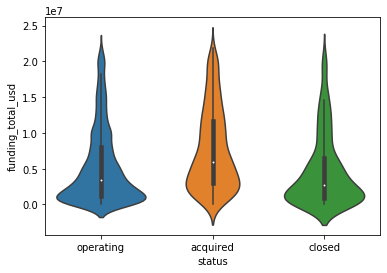

In [84]:
# your code here

sns.violinplot(data=funding_total_normalize, x='status', y = 'funding_total_usd')

❓Notice a slight distinction between startups that are operating/closed and the ones that were acquired?

-------

2️⃣ Now let's make a Violinplot of the total startup funding distribution for each year. Do you notice how a certain historic event affected startup funding?

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<pre>
sns.violinplot(data=funding_total_normalized, x='founded_year', y='funding_total_usd')
</pre>
<p>Notice the difference between the violin shapes between 2001-2008 and 2009-2013. Hmm, did something happen in 2008? 📉</p>
</details>

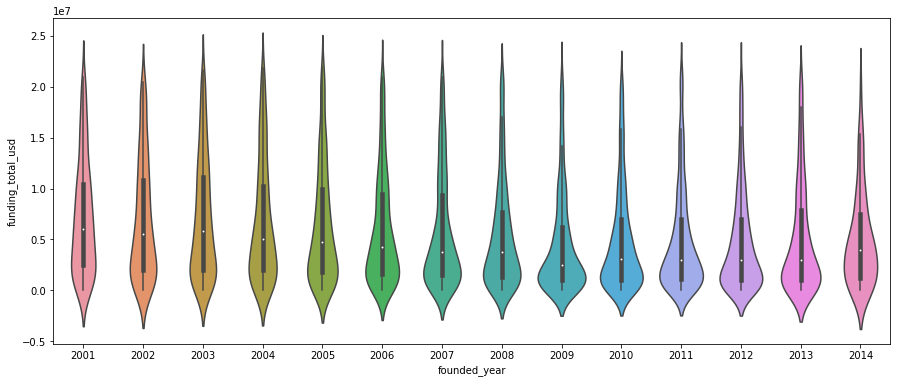

In [85]:
# remember, you can adjust the figure size before every plot for readability
plt.figure(figsize=(15, 6))
# your code here
sns.violinplot(data = funding_total_normalized, x='founded_year',y='funding_total_usd')

-----

#### We can add some more variety using a [Seaborn Catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) with different `kind` property - `violin`, `box`, `boxen`, `bar`. Try to run the cell below!

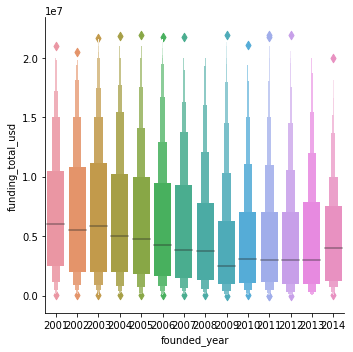

In [86]:
sns.catplot(data=funding_total_normalized, x='founded_year', y='funding_total_usd', kind='boxen')

Because `catplot` is a uniquely `seaborn` plot, it doesn't change size with the `plt.figure` code we were using before. To make it more readable, we instead simply add the `height` and `aspect` as more attributes to our line of code above.

For example, you can add `height=6, aspect=15/6` to your list of countplot attributes.

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<pre>
sns.catplot(data=funding_total_normalized, x='founded_year', y='funding_total_usd', kind='boxen', height=6, aspect=15/6)
</pre>
</details>


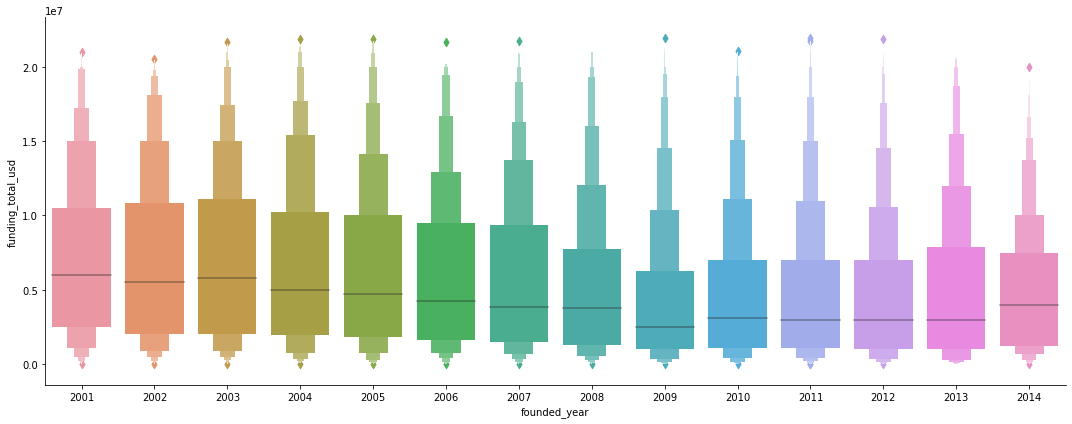

In [87]:
# your code here
sns.catplot(data=funding_total_normalized, x='founded_year', y='funding_total_usd', kind='boxen', height=6, aspect=15/6)

Go ahead and try out the different kinds of `catplot` apart from `boxen`! And if you are looking for an extra challenge, we've got one.

-----

🏋️‍ **Optional: Adding an order**: We have hundreds of markets and countries where startups participate, but let's make a Catplot or Violinplot of the distribution of total funding over the most present markets or countries.

**Tip**: we have added orders in previous plots so do not hesitate to check your previous challenges! 🧐

<br>

<details>
    <summary>Not sure how? Click to see solution 🙈</summary>

<pre>
order = funding_total_normalized['market'].value_counts().head(10).index
sns.catplot(data=funding_total_normalized, x='market', y='funding_total_usd', order=order, kind='boxen', height=6, aspect=15/6)
</pre>
<p>You can replace 'market' with 'country_code' if you are going for top 10 countries</p>
</details>


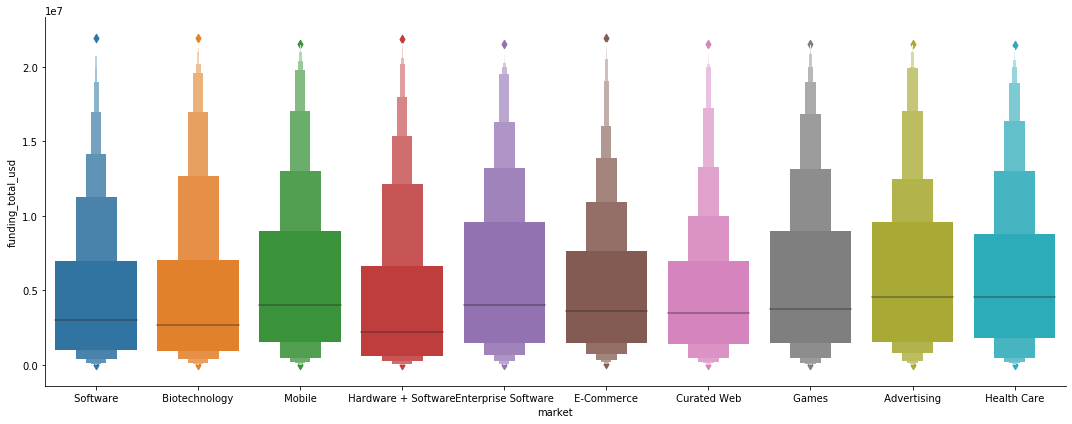

In [88]:
# your code here
order = funding_total_normalized['market'].value_counts().head(10).index
sns.catplot(data = funding_total_normalized, x = 'market', y='funding_total_usd', order=order, kind = 'boxen', height = 6, aspect=15/6)

-----

### 🤓 Going further? Let's do some Correlation Analysis

We don't really have a way to put this Crunchbase data on a map like we did with AirBnB listings (unless you are willing to map the country codes to longitude and latitude, you beast! 😮), but we still want you to explore some advanced visualizations we can do!

----

⚖️Before we jump into **[correlation](https://www.datasciencecentral.com/profiles/blogs/difference-between-correlation-and-regression-in-statistics)** we will need to standardize our data a bit more. For example, we will not see meaningful correlation between startups' angel and seed funding if some only received one of those.

Go ahead and run the cell below. You will see we are creating two new variables - one for startups with both angel and seed investment, and another for startups with all three rounds of investment. This will help us make more sense from the graphs we are about to see! 🔍

In [90]:
startups_with_seed_and_angel = funding_total_normalized.query('seed > 0 & angel > 0')
startups_with_all_rounds =  funding_total_normalized.query('round_A > 0 & round_B > 0 & round_C > 0')

-----

Now let's go ahead and test our first correlation between angel and seed investments using a [Seaborn Relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot). Do you have any assumptions of what the relation could be? 🤔

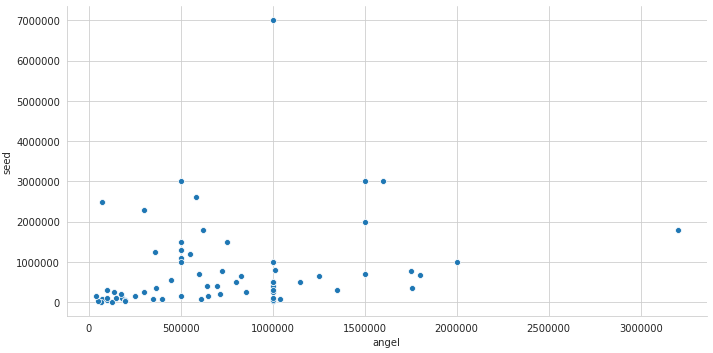

In [91]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="angel", y="seed", data=startups_with_seed_and_angel, height=5, aspect=10/5)

-------

You can start noticing there are some clusters in this Relplot. We have a better way of seeing them using a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

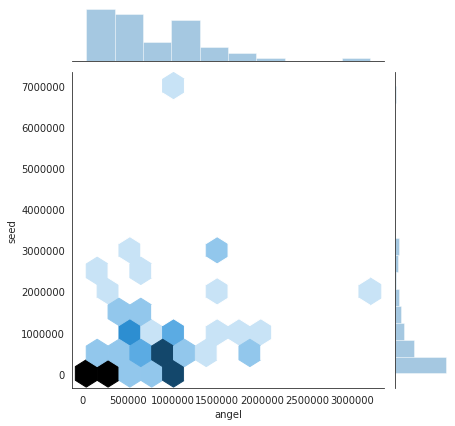

In [92]:
with sns.axes_style("white"):
    sns.jointplot(x="angel", y="seed", kind='hex', data=startups_with_seed_and_angel, height=6)

------

🔍 The correlation is still not entirely clear though, is it? Let's use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation.

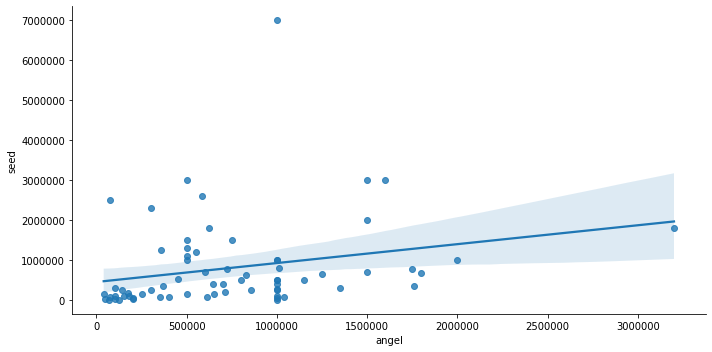

In [93]:
sns.lmplot(x="angel", y="seed", data=startups_with_seed_and_angel, height=5, aspect=10/5)

The goal of today is not to do any Machine Learning, but hey! you just did your first **[Regression](https://www.datasciencecentral.com/profiles/blogs/difference-between-correlation-and-regression-in-statistics)** 🔥

Following the graphical linear regression we just drew, we can predict new values based on existing data. 🔮

You can go ahead and try replacing the values of `x`, `y` and `data` with other values! 🤓Remember, we also have `startups_with_seed_and_angel` and `startups_with_all_rounds` DataFrames that can be used as data!

In [ ]:
# your code here

--------

We can also add a `col` attribute to our plot above, for example `col='status'`. Let's see what we get:

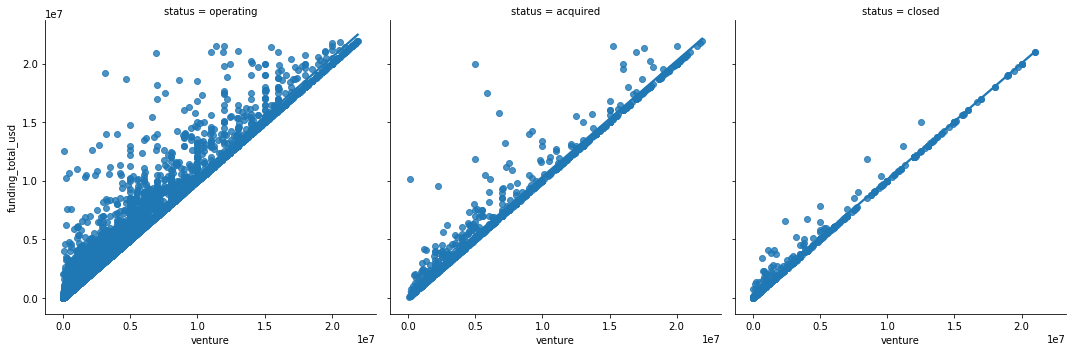

In [94]:
sns.lmplot(x="venture", y="funding_total_usd", col="status", data=funding_total_normalized)

💥What we see is a very direct correlation between a startups ability to raise venture capital and other types of funding. And we can see how the data is skewed towards higher total funding in the startups that are still operating! 💪

-------

## 🚀 Congrats on completing the challenges! You rock!

If you want to build on top of what you learned today, check out these resources to continue your Python Data Visualization journey 🙌

* [Different color pallets of Seaborn plots](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Play around with Seaborn official tutorial data](https://seaborn.pydata.org/tutorial.html)
* [How to customize your plots with custom labels, legends and more](https://hookedondata.org/better-plotting-in-python-with-seaborn/)